In [1509]:
import pandas as pd
import numpy as np
import math
import warnings
from IPython.display import display
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)


#import my different data sets.
dfNY = pd.read_csv('ny.csv')
dfAL = pd.read_excel('alabama.xls', index = False)
dfIL = pd.read_excel('illinois.xls', index = False)


dfNY.columns = (['City', 'Population', 'Violent Crime', 'Murder', 'Rape1', 'Rape', 'Robbery', 'Aggravated Assault',
               'PropertyCrime', 'Burglary', 'Larceny', 'MV Theft', 'Arson'])


dfAL.columns = (['City', 'Population', 'Violent Crime', 'Murder', 'Rape1', 'Rape', 'Robbery', 'Aggravated Assault',
               'PropertyCrime', 'Burglary', 'Larceny', 'MV Theft', 'Arson','13','14','15'])


dfIL.columns = (['City', 'Population', 'Violent Crime', 'Murder', 'Rape1', 'Rape', 'Robbery', 'Aggravated Assault',
               'PropertyCrime', 'Burglary', 'Larceny', 'MV Theft', 'Arson'])

#Drop na's at the end
dfNY = dfNY.dropna(subset = ['Population'])
dfAL = dfAL.dropna(subset = ['Population'])
dfIL = dfIL.dropna(subset = ['Population'])

#Drop weird header data
dfNY = dfNY.iloc[4:]
dfAL = dfAL.iloc[4:]
dfIL = dfIL.iloc[4:]
dfNY.head()

,City,Population,Violent Crime,Murder,Rape1,Rape,Robbery,Aggravated Assault,PropertyCrime,Burglary,Larceny,MV Theft,Arson
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,"4,089",5,0,NaN,0,3,2,46,10,36,0,NaN
10,Allegany Village,"1,781",3,0,NaN,0,0,3,10,0,10,0,0
11,Amherst Town,"118,296",107,1,NaN,7,31,68,"2,118",204,"1,882",32,3


In [1510]:
#Clean data in a more pythonic way

# New York Data
#Remove commas and spaces
for col in dfNY.columns:
    dfNY[col]= dfNY[col].apply(lambda x: str(x).replace(',', ''))
    dfNY[col]= dfNY[col].apply(lambda x: str(x).strip())

#Convert strings to floats
numerical_columns = dfNY.columns[1:]
for num_col in numerical_columns:
    dfNY[num_col]= dfNY[num_col].apply(lambda x: float(x))
    
#Illinois Data
    
for col in dfIL.columns:
    dfIL[col]= dfIL[col].apply(lambda x: str(x).replace(',', ''))
    dfIL[col]= dfIL[col].apply(lambda x: str(x).strip())

#Convert strings to floats
numerical_columns = dfIL.columns[1:]
for num_col in numerical_columns:
    dfIL[num_col]= dfIL[num_col].apply(lambda x: float(x))
    
#Alabama Data

for col in dfNY.columns:
    dfAL[col]= dfAL[col].apply(lambda x: str(x).replace(',', ''))
    dfAL[col]= dfAL[col].apply(lambda x: str(x).strip())

#Convert strings to floats
numerical_columns = dfAL.columns[1:]
for num_col in numerical_columns:
    dfAL[num_col]= dfAL[num_col].apply(lambda x: float(x))
    

In [1511]:
print(missing_valueNY[:])
print(missing_valueAL[:])
print(missing_valueIL[:])



PropertyCrime    0
Population       0
Murder           0
Robbery          0
dtype: int64
PropertyCrime    0
Population       0
Murder           0
Robbery          0
dtype: int64
PropertyCrime    0
Population       0
Murder           0
Robbery          0
dtype: int64


In [1512]:
dfNY['Population2'] = dfNY['Population']**2
dfNY['Robbery2'] = dfNY['Robbery']**2
dfNY['Murder'] = dfNY["Murder"].apply(lambda x: 0 if x < 1 else 1)


In [1513]:
dfNY.drop(dfNY[dfNY.Population >150000].index, inplace=True)
dfNY.sort_values(by=['Population'], ascending = False).head(5)

,City,Population,Violent Crime,Murder,Rape1,Rape,Robbery,Aggravated Assault,PropertyCrime,Burglary,Larceny,MV Theft,Arson,Population2,Robbery2
314,Syracuse,143834.000,1192.000,1,nan,75.000,400.000,696.000,6473.000,1781.000,4298.000,394.000,57.000,20688219556.000,160000.000
11,Amherst Town,118296.000,107.000,1,nan,7.000,31.000,68.000,2118.000,204.000,1882.000,32.000,3.000,13993943616.000,961.000
7,Albany,97956.000,791.000,1,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan,9595377936.000,51529.000
130,Greece Town,96667.000,151.000,0,nan,9.000,60.000,82.000,2303.000,332.000,1925.000,46.000,nan,9344508889.000,3600.000
271,Ramapo Town,87204.000,57.000,1,nan,5.000,9.000,41.000,567.000,88.000,466.000,13.000,nan,7604537616.000,81.000


In [1514]:
dfNY.head(5)

,City,Population,Violent Crime,Murder,Rape1,Rape,Robbery,Aggravated Assault,PropertyCrime,Burglary,Larceny,MV Theft,Arson,Population2,Robbery2
7,Albany,97956.000,791.000,1,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan,9595377936.000,51529.000
8,Albion Village,6388.000,23.000,0,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan,40806544.000,16.000
9,Alfred Village,4089.000,5.000,0,nan,0.000,3.000,2.000,46.000,10.000,36.000,0.000,nan,16719921.000,9.000
10,Allegany Village,1781.000,3.000,0,nan,0.000,0.000,3.000,10.000,0.000,10.000,0.000,0.000,3171961.000,0.000
11,Amherst Town,118296.000,107.000,1,nan,7.000,31.000,68.000,2118.000,204.000,1882.000,32.000,3.000,13993943616.000,961.000


## Model with all variables

In [1515]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = dfNY['PropertyCrime'].values.reshape(-1, 1)
X = dfNY[['Population','Murder','Robbery', 'Population2', 'Robbery2']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.28387252e-02   1.95953986e+01   6.95345933e+00   6.14004559e-08
    6.52192713e-04]]

Intercept: 
 [ 25.58281101]

R-squared:
0.868140679395


## Explore mulitvariate normality and homoscedacity

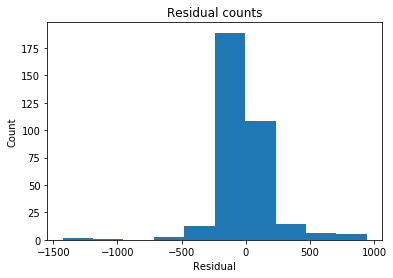

In [1516]:
#X = df[['Population','Murder','Robbery', 'Population2', 'Robbery2']]

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = dfNY['PropertyCrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# Hist plot of residuals
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

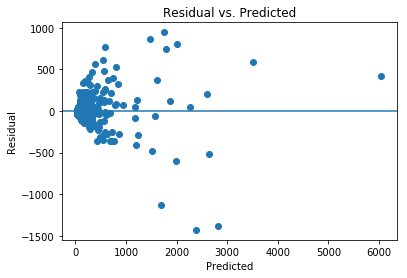

In [1517]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [1518]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Population,Murder,Robbery,Population2,Robbery2
Population,1.000,0.497,0.685,0.899,0.550
Murder,0.497,1.000,0.488,0.388,0.335
Robbery,0.685,0.488,1.000,0.717,0.906
Population2,0.899,0.388,0.717,1.000,0.709
Robbery2,0.550,0.335,0.906,0.709,1.000


## Model I settled on

In [1519]:
regr = linear_model.LinearRegression()
Y = dfNY['PropertyCrime'].values.reshape(-1, 1)
X = dfNY[['Murder','Population2','Robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.40101778e+02   1.73851917e-07   7.17643328e+00]]

Intercept: 
 [ 128.28562057]

R-squared:
0.84214372793


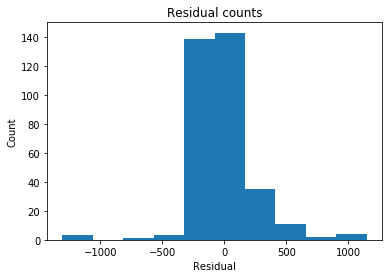

In [1520]:
#X = df[['Murder','Population2','Robbery']]
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = dfNY['PropertyCrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# Hist plot of residuals
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

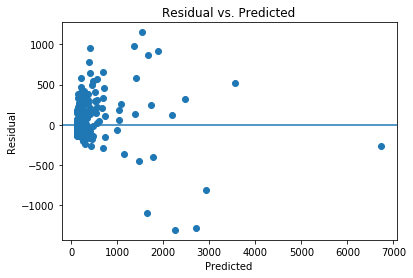

In [1521]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [1522]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Murder,Population2,Robbery
Murder,1.000,0.388,0.488
Population2,0.388,1.000,0.717
Robbery,0.488,0.717,1.000


Initially, I removed cities over 150,000 in population to reduce my population variance(this removed 3 cities). My initial model from the previous assignment(with robbery as a binary categorical) was giving me a -7 intercept which didn't intuitively make sense to me and gave me an R2 of .76

I decided to leave the robbery column as a continuous variable and explored the linearity of the Population and Robbery features. Unfortunately, neither the raw or transformed features(both the sqrt and square) seemed to help the linearity of the relationship to my outcome. 

The error from all 3 of my potential models had some right skew to them. I tried correcting this by squaring and taking the sqaure of the continous independant variables (Population and Robbery), but it didn't noticeably help the normality or homoscedacity. 

Even though my final model has a stronger correlation between Robbery and Population2,the I would like, it explained 84% of the variance in the PropertyCrime and the intercept, directions and powers of the coefficenets for each dependent variable made intuitive sense.





In [1523]:
linear_formula = 'PropertyCrime ~ Murder+Population2+Robbery'
# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=dfNY).fit()

In [1524]:
lm.params

Intercept     128.286
Murder        140.102
Population2     0.000
Robbery         7.176
dtype: float64

In [1525]:
lm.pvalues

Intercept     0.000
Murder        0.002
Population2   0.000
Robbery       0.000
dtype: float64

In [1526]:
lm.rsquared

0.84214372793020531

In [1527]:
#Create features for AL an IL
dfAL['Population2'] = dfAL['Population']**2
dfAL['Murder'] = dfAL['Murder'].apply(lambda x: 1 if x >=1 else 0)

dfIL['Population2'] = dfIL['Population'] ** 2
dfIL['Murder'] = dfIL['Murder'].apply(lambda x: 1 if x >=1 else 0)


In [1528]:
dfIL.drop(dfIL[dfIL.Population >150000].index, inplace=True)

dfAL.sort_values(by=['Population'], ascending = False).head(5)
#dfIL.sort_values(by=['Population'], ascending = False).head(5)

,City,Population,Violent Crime,Murder,Rape1,Rape,Robbery,Aggravated Assault,PropertyCrime,Burglary,Larceny,MV Theft,Arson,13,14,15,Population2
121,Mobile4,250557.000,1541.000,1,88.000,nan,459.000,965.000,13011.000,3207.000,9123.000,681.000,nan,nan,nan,nan,62778810249.000
24,Birmingham,212001.000,2852.000,1,178.000,nan,969.000,1642.000,14157.000,4018.000,8661.000,1478.000,nan,nan,nan,nan,44944424001.000
94,Huntsville,184738.000,1507.000,1,87.000,nan,391.000,1005.000,9216.000,1884.000,6629.000,703.000,nan,nan,nan,nan,34128128644.000
186,Tuscaloosa,94126.000,434.000,1,44.000,nan,161.000,221.000,4512.000,1165.000,3196.000,151.000,nan,nan,nan,nan,8859703876.000
92,Hoover,84139.000,74.000,1,9.000,nan,34.000,29.000,2596.000,344.000,2144.000,108.000,1.000,nan,nan,nan,7079371321.000


In [1529]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Murder,Population2,Robbery
Murder,1.000,0.388,0.488
Population2,0.388,1.000,0.717
Robbery,0.488,0.717,1.000


In [1530]:
lm = smf.ols(formula=linear_formula, data=dfAL).fit()

In [1531]:
lm.params

Intercept     138.349
Murder        529.768
Population2     0.000
Robbery         8.585
dtype: float64

In [1532]:
lm.pvalues

Intercept     0.000
Murder        0.000
Population2   0.000
Robbery       0.000
dtype: float64

In [1533]:
lm.rsquared

0.96226569819997532

In [1534]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Murder,Population2,Robbery
Murder,1.000,0.388,0.488
Population2,0.388,1.000,0.717
Robbery,0.488,0.717,1.000


In [1535]:
lm = smf.ols(formula=linear_formula, data=dfIL).fit()

In [1536]:
lm.params

Intercept     122.298
Murder         86.935
Population2     0.000
Robbery         9.462
dtype: float64

In [1537]:
lm.pvalues

Intercept     0.000
Murder        0.003
Population2   0.000
Robbery       0.000
dtype: float64

In [1538]:
lm.rsquared

0.81620093377109815

Alabama doesnt fit very well. the rsquared changes too much. The murder coefficient is significant but its probably throwing off the rsqaured.

Cross-validated scores: [ 0.86018436  0.66836403  0.6087018   0.61059084  0.70893471  0.94902743]
Cross-Predicted Accuracy: 0.827785587704


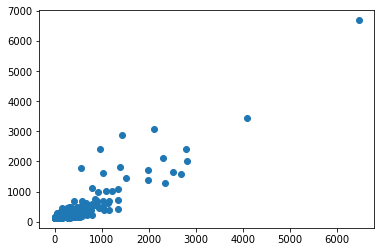

In [1539]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
data = dfNY[['Murder', 'Population2', 'Robbery']]
target = dfNY['PropertyCrime']

# initialize ln function
lm = LinearRegression()

# Fit data
model = lm.fit(data, target)

# Perform 6-fold cross validation
scores = cross_val_score(lm, data, target, cv=6)
print ("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(model, data, target, cv=6)
plt.scatter(target, predictions)
accuracy = metrics.r2_score(target, predictions)

print ("Cross-Predicted Accuracy:", accuracy)



In [1540]:
# My model is pretty awful.

Cross-validated scores: [ 0.84573138  0.7780174   0.96098338  0.98935892  0.66196909  0.83400935]
Cross-Predicted Accuracy: 0.907601362315


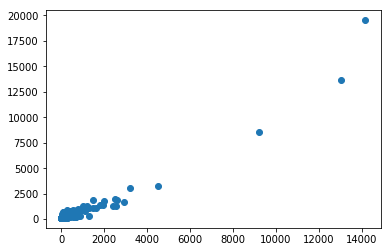

In [1541]:
data = dfAL[['Murder', 'Population2', 'Robbery']]
target = dfAL['PropertyCrime']

# initialize ln function
lm = LinearRegression()

# Fit data
model = lm.fit(data, target)

# Perform 6-fold cross validation
scores = cross_val_score(lm, data, target, cv=6)
print ("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(model, data, target, cv=6)
plt.scatter(target, predictions)
accuracy = metrics.r2_score(target, predictions)

print ("Cross-Predicted Accuracy:", accuracy)


Cross-validated scores: [ 0.77963395  0.8063042   0.54926778  0.56696303  0.82328234  0.88897349]
Cross-Predicted Accuracy: 0.780899679299


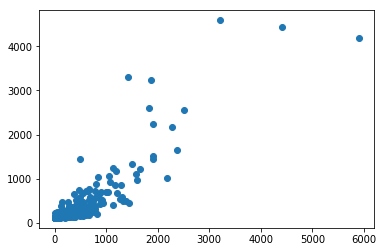

In [1542]:
data = dfIL[['Murder', 'Population2', 'Robbery']]
target = dfIL['PropertyCrime']

# initialize ln function
lm = LinearRegression()

# Fit data
model = lm.fit(data, target)

# Perform 6-fold cross validation
scores = cross_val_score(lm, data, target, cv=6)
print ("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(model, data, target, cv=6)
plt.scatter(target, predictions)
accuracy = metrics.r2_score(target, predictions)

print ("Cross-Predicted Accuracy:", accuracy)

## Make a new Model
  I wanted to try to increase the consistency of the crossval scores while bringing the Rsquared for Alabama closer to the NY and IL models.

In [1543]:
#Can't take log of zero. Turn 0's to 1's
dfNY['Robbery'] = dfNY['Robbery'] + 1
dfNY['PropertyCrime'] = dfNY['PropertyCrime'] + 1

dfNY['Robbery_log'] = np.log(dfNY['Robbery'])
dfNY['PropertyCrime_log'] = np.log(dfNY['PropertyCrime']) 

dfNY['ViolentCrime'] = dfNY['Violent Crime']


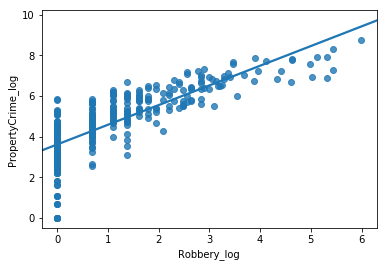

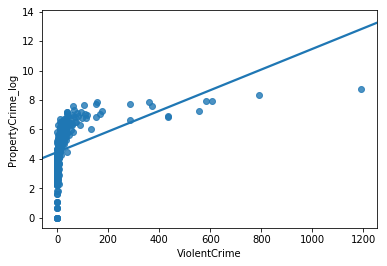

In [1544]:
sns.regplot(dfNY['Robbery_log'], dfNY['PropertyCrime_log'], ci = False)
plt.show()
sns.regplot(dfNY['ViolentCrime'], dfNY['PropertyCrime_log'], ci = False)
plt.show()

Cross-validated scores: [ 0.70135658  0.62489584  0.67220336  0.58718964  0.62893957  0.6902279 ]
Cross-Predicted Accuracy: 0.656794522043


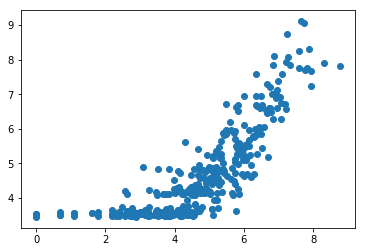

In [1555]:
data = dfNY[['ViolentCrime', 'Population', 'Robbery_log']]
target = dfNY['PropertyCrime_log']

# initialize ln function
lm = LinearRegression()

# Fit data
model = lm.fit(data, target)

# Perform 6-fold cross validation
scores = cross_val_score(lm, data, target, cv=6)
print ("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(model, data, target, cv=6)
plt.scatter(target, predictions)
accuracy = metrics.r2_score(target, predictions)

print ("Cross-Predicted Accuracy:", accuracy)

In [1556]:
lm = smf.ols(formula=linear_formula, data=dfNY).fit()
linear_formula = 'PropertyCrime_log ~ Robbery_log+Population+ViolentCrime'
lm.params

Intercept       3.467
Robbery_log     0.880
Population      0.000
ViolentCrime   -0.003
dtype: float64

In [1557]:
lm.pvalues

Intercept      0.000
Robbery_log    0.000
Population     0.000
ViolentCrime   0.000
dtype: float64

In [1558]:
lm.rsquared

0.66176509076079504

## Alabama new features and model

In [1561]:
#Can't take log of zero. Turn 0's to 1's
dfAL['Robbery'] = dfAL['Robbery'] + 1
dfAL['PropertyCrime'] = dfAL['PropertyCrime'] + 1



dfAL['Robbery_log'] = np.log(dfAL['Robbery'])
dfAL['PropertyCrime_log'] = np.log(dfAL['PropertyCrime'])

dfAL['ViolentCrime'] = dfAL['Violent Crime']

dfAL = dfAL.fillna(0)


Cross-validated scores: [ 0.73909446  0.85039472  0.76689211  0.86497919  0.75686714  0.80027495]
Cross-Predicted Accuracy: 0.792400437329


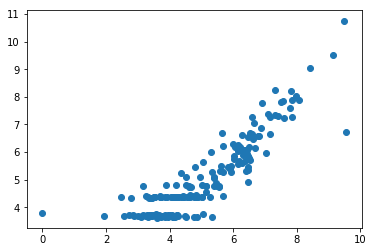

In [1562]:
data = dfAL[['ViolentCrime', 'Population', 'Robbery_log']]
target = dfAL['PropertyCrime_log']

# initialize ln function
lm = LinearRegression()

# Fit data
model = lm.fit(data, target)

# Perform 6-fold cross validation
scores = cross_val_score(lm, data, target, cv=6)
print ("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(model, data, target, cv=6)
plt.scatter(target, predictions)
accuracy = metrics.r2_score(target, predictions)

print ("Cross-Predicted Accuracy:", accuracy)

In [1569]:
lm = smf.ols(formula=linear_formula, data=dfAL).fit()
linear_formula ='PropertyCrime_log ~ ViolentCrime+Population+Robbery_log'
lm.params

Intercept       3.678
ViolentCrime   -0.001
Population      0.000
Robbery_log     0.988
dtype: float64

In [1570]:
lm.pvalues

Intercept      0.000
ViolentCrime   0.001
Population     0.012
Robbery_log    0.000
dtype: float64

In [1571]:
lm.rsquared

0.81561315596575912

## Illinois Model

In [1576]:
#Can't take log of zero. Turn 0's to 1's
dfIL['Robbery'] = dfIL['Robbery'] + 1
dfIL['PropertyCrime'] = dfIL['PropertyCrime'] + 1

dfIL['Robbery_log'] = np.log(dfIL['Robbery'])
dfIL['PropertyCrime_log'] = np.log(dfIL['PropertyCrime'])

dfIL['ViolentCrime'] = dfIL['Violent Crime']


Cross-validated scores: [ 0.65546252  0.65223159  0.5964108   0.60751847  0.64331158  0.60613455]
Cross-Predicted Accuracy: 0.630450265057


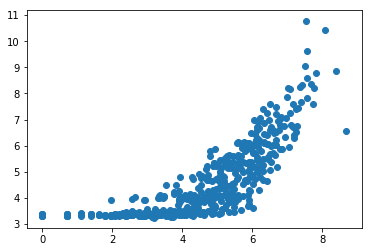

In [1577]:
data = dfIL[['ViolentCrime', 'Population', 'Robbery_log']]
target = dfIL['PropertyCrime_log']

# initialize ln function
lm = LinearRegression()

# Fit data
model = lm.fit(data, target)

# Perform 6-fold cross validation
scores = cross_val_score(lm, data, target, cv=6)
print ("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(model, data, target, cv=6)
plt.scatter(target, predictions)
accuracy = metrics.r2_score(target, predictions)

print ("Cross-Predicted Accuracy:", accuracy)

In [1590]:
lm = smf.ols(formula=linear_formula, data=dfIL).fit()
linear_formula = 'PropertyCrime_log ~ ViolentCrime+Population+Robbery_log'
lm.params

Intercept       3.309
ViolentCrime   -0.004
Population      0.000
Robbery_log     0.828
dtype: float64

In [1591]:
lm.pvalues

Intercept      0.000
ViolentCrime   0.000
Population     0.000
Robbery_log    0.000
dtype: float64

In [1592]:
lm.rsquared

0.63641536342050731

After iterating through probably 30 models, I ended up with a model that isn't great, but is a slight improvement over my first model. My holdout scores were much more consistent within each dataset, but my rsquared values suffered, although the Alabama rsquared came down to a more reasonable 81.5. I was able to get them close to consistent across all 3 states, but by pvalues were as high as 80% and I had to drop the features that made the r2 more consistent.

It's not surprising that IL and NY were reasonably consistent while Alabama always had a different r2 as NY and IL are more similar to each other than they are to Alabama. 

If were running this on all 50 states, I think I would try to use Naive Bayes to classify the states into certain categories and then run a regression model. 